In [4]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from scipy.signal import decimate
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
from scipy.linalg import eig
from scipy.sparse import csr_matrix
from scipy.signal import convolve2d
#from skimage.utils.shape import view_as_blocks

In [2]:
data_path = os.getcwd() + "/data/JPEGImages/480p/"
anno_path = os.getcwd() + "/data/Annotations/480p/"

In [3]:
bear_path = data_path + "bear/"
abear_path = anno_path + "bear/"

In [4]:
bear = Image.open(bear_path+"00000.jpg").convert(mode="RGB")
abear = Image.open(abear_path+"00000.png").convert(mode="L")

In [5]:
beararr.shape

NameError: name 'beararr' is not defined

In [5]:
def xyrgb(img_arr):
    count = 0
    temp = np.zeros((5,img_arr.shape[0]*img_arr.shape[1]))
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            temp[:,count] = np.array([i,j,img_arr[i,j][0], img_arr[i,j][1], img_arr[i,j][2]])
            count +=1
            
    return temp

In [6]:
def reconstruct(xyrgb,xsize,ysize):
    out = np.zeros((xsize,ysize))
    count = 0
    for i in range(xsize):
        for j in range(ysize):
            out[i,j] = xyrgb[count]
            count += 1
            
    return out
            
        
        

In [7]:
def rgb(img_arr):
    count = 0
    temp = np.zeros((3,img_arr.shape[0]*img_arr.shape[1]))
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            temp[:,count] = np.array([img_arr[i,j][0], img_arr[i,j][1], img_arr[i,j][2]])
            count +=1
            
    return temp

In [8]:
def down_sample(img,n):
    img_d=decimate(img, n, n=2, ftype='iir',axis=0, zero_phase=True)
    img_d=decimate(img_d, n, n=2, ftype='iir',axis=1, zero_phase=True)
    return img_d.astype("uint8") 

In [9]:
def colourlist(n):
    out = []
    r = np.random.randint(0,255)
    g = np.random.randint(0,255)
    b = np.random.randint(0,255)
    div = 256 / n
    for i in range(1,n+1):
        colour = np.array([(r+i*div)%256,(g+i*div)%256,(b+i*div)%256 ])
        out.append(colour)
        
    return out

In [10]:
def jaccard_index(img1, img2):
    """ Calculates the Jaccard index (IoU) measure for 2 detection bounding
        boxes in a frame.
        box1, box2: 2-tuples of the form (x, y), representing coordinates of
            the top left corner of the box.
        imshape: A 2-tuple (H, W), the shape of the image in which the boxes
            are detected.
    """

    plus = img1 + img2
    i = np.where(plus==2,1, 0)
    #print(i)
    j = np.where(plus != 0, 1, 0)
    #print(j)
    intersection = i.sum()
    
    union = j.sum()
    
    return intersection / union

In [75]:
def gaussian_kernel(arr, var=0.1):
    return np.exp((-1./(2*var))*arr**2)

In [13]:
def normalise(xyrgb):
    inlessmeans = xyrgb- np.mean(xyrgb, axis=0)
    stds = np.std(xyrgb, axis=0)
    out = inlessmeans / stds
    return out

In [16]:
beararr = np.asarray(bear)
abeararr = np.asarray(abear)

In [54]:
smallbear = down_sample(bear,15)
smallabear = down_sample(abear,15)

In [39]:
smallbear.shape

(32, 57, 3)

In [1]:
window_size = 3

In [2]:
im = np.arange(108).reshape(12,9)
print(np.swapaxes(im.reshape(3,3,3,-1),1,2).shape)

NameError: name 'np' is not defined

In [3]:
def create_windows(arr, s):
    out = np.zeros((int(arr.shape[0]/s), int(arr.shape[1]/s), arr.shape[2]))
    for i in range(0,arr.shape[0],s):
        for j in range(0,arr.shape[1],s):
            window = arr[i:i+s,j:j+s]
            #print(window.shape)
            redsum = 0
            bluesum = 0
            greensum = 0
            for k in range(window.shape[0]):
                for l in range(window.shape[1]):
                    redsum+= window[k,l,0]
                    bluesum += window[k,l,1]
                    greensum += window[l,l,2]
                    
                    #print(redsum)
                    
            thing = np.array([redsum,bluesum,greensum]) / s**2
            
            #print(thing)
                    
            
            out[int(i/s),int(j/s)] = thing
            #print(out)
            
    return out

In [104]:
windowed_bear = create_windows(beararr, window_size)
Image.fromarray(windowed_bear,mode="RGB")
#windowed_bear.shape

IndexError: index 284 is out of bounds for axis 1 with size 284

In [78]:
def generate_aff_diag_matrix(img):
    features = xyrgb(img).T
    print(features)
    aff = gaussian_kernel(cdist(features,features))
    print(aff)
    
    diag = np.diag(np.sum(aff, axis=1))
            
    return aff, diag

In [79]:
smallbearaff, smallbeardiag = generate_aff_diag_matrix(windowed_bear)

[[ 0.  0. 40. 36. 33.]
 [ 0.  1. 65. 60. 57.]
 [ 0.  2. 76. 70. 70.]
 ...
 [39. 69. 46. 49. 32.]
 [39. 70. 49. 50. 35.]
 [39. 71. 61. 62. 51.]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  3.72007598e-44 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.72007598e-44
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [23]:
smallbearaff * smallbearaff

array([[1.00000000e+000, 8.78095431e-001, 9.60789439e-001, ...,
        7.85831846e-136, 3.73327436e-115, 2.18267575e-124],
       [8.78095431e-001, 1.00000000e+000, 8.78095431e-001, ...,
        6.38631705e-137, 1.13280924e-114, 9.25701225e-122],
       [9.60789439e-001, 8.78095431e-001, 1.00000000e+000, ...,
        1.96171162e-133, 9.69989934e-113, 5.90253161e-122],
       ...,
       [7.85831846e-136, 6.38631705e-137, 1.96171162e-133, ...,
        1.00000000e+000, 1.86082719e-012, 2.01499384e-066],
       [3.73327436e-115, 1.13280924e-114, 9.69989934e-113, ...,
        1.86082719e-012, 1.00000000e+000, 1.24218515e-022],
       [2.18267575e-124, 9.25701225e-122, 5.90253161e-122, ...,
        2.01499384e-066, 1.24218515e-022, 1.00000000e+000]])

In [46]:
def generate_diagonal(img,aff=None):
    if aff is None:
        aff = generate_aff_matrix(img)
    return np.diag(np.sum(aff, axis=1))

In [157]:
threshold = 1e-10
smallbearaff= np.where(smallbearaff > threshold, smallbearaff,0.)
smallbeardiag = np.where(smallbeardiag > threshold, smallbeardiag,0.)

In [49]:
def generate_laplacian(img, aff=None, diag=None):
    if diag is None or aff is None:
        return generate_diagonal(img)-generate_aff_matrix(img)
    else:
        return diag-aff

In [80]:
smallbearlap = smallbeardiag- smallbearaff
#smallbeardiag = smallbeardiag
#smallbeardiagminhalf = np.sqrt(np.linalg.inv(smallbeardiag))

In [53]:
normlap = smallbeardiagminhalf * smallbearlap * smallbeardiagminhalf


In [54]:
normlap

array([[ 4.53999297e-05, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  4.12230737e-09, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [61]:
threshold = 1e-8
#smallbearlap = np.where(smallbearlap > threshold, smallbearlap, 0.)
#smallbeardiag = np.where(smallbeardiag > threshold, smallbeardiag,0.)
#smallbearaff= np.where(smallbearaff > threshold, smallbearaff,0.)
normlap = np.where(normlap > threshold, normlap,0.)

In [55]:
smallbearlapsp = csr_matrix(smallbearlap)
smallbeardiagsp = csr_matrix(smallbeardiag)
#smallbearaffsp = csr_matrix(smallbearaff)
normlapsp = csr_matrix(normlap)
#normlapsp

In [81]:
newlap = 2*np.eye(smallbearaff.shape[0]) - smallbearlap
newdiag = 2*np.eye(smallbeardiag.shape[0]) - smallbeardiag

In [81]:
newlap

array([[-8.03930934e-001,  1.77610355e-003,  1.15019616e-009, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 1.77610355e-003,  6.11394333e-001,  1.68512013e-002, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 1.15019616e-009,  1.68512013e-002,  9.07545746e-001, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         1.99567733e+000,  4.82368767e-022,  5.41398090e-086],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         4.82368767e-022,  1.80244230e+000,  2.75386264e-192],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         5.41398090e-086,  2.75386264e-192,  1.99623242e+000]])

In [90]:
smallbeareigvals, smallbeareigvecs = eigsh(newlap,k=2,which='LM')

KeyboardInterrupt: 

In [83]:
alpha = smallbeareigvals[0]

w = smallbeareigvecs[:,1]
split = np.median(w)
split

-9.350607652935991e-18

In [87]:
partition = np.where(w >0, 1,0)
        
    

In [35]:
partition.reshape(smallbear.shape[0], smallbear.shape[1])

NameError: name 'smallbear' is not defined

In [88]:
p = partition.reshape(windowed_bear.shape[0], windowed_bear.shape[1])

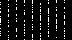

In [89]:
Image.fromarray(255*p, mode='L')

In [41]:
def scale_back_up(orig, par, s):
    out = np.zeros((orig.shape[0], orig.shape[1]))
    for i in range(par.shape[0]):
        for j in range(par.shape[1]):
            out[s*i:s*(i+1),s*j:s*(j+1)] = par[i,j] * np.ones((s,s))
            
    return out

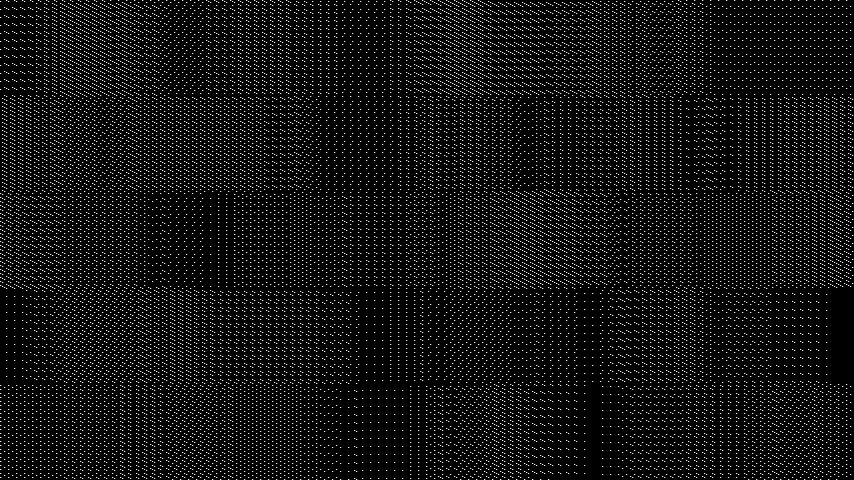

In [42]:
thing = scale_back_up(beararr,p,window_size)
Image.fromarray(thing, mode='L')

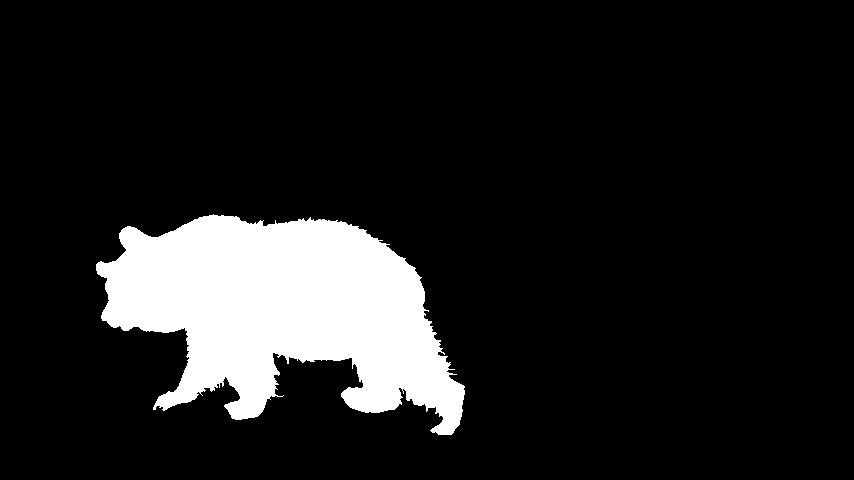

In [34]:
Image.fromarray(abeararr, mode='L')

In [188]:
k = KMeans(n_clusters=2)

In [190]:
k.fit(smallbeareigvecs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [191]:
k.labels_[k.labels_ > 0]

array([1], dtype=int32)